In [ ]:
import pandas as pd
train_data = pd.read_csv('train.csv')

In [ ]:
print(train_data.columns)

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

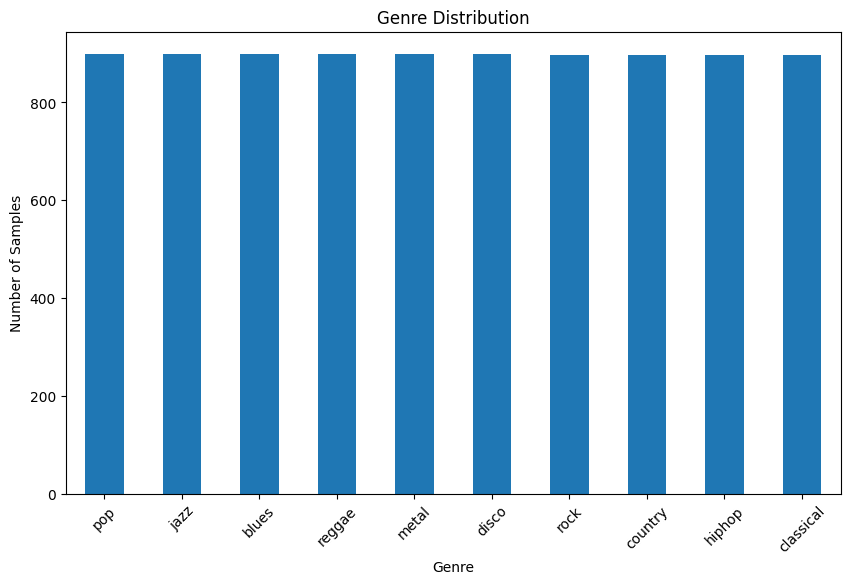

Total Samples: 8991
Maximum Samples in a Genre: 900
Minimum Samples in a Genre: 898
Class Imbalance: 0.0022222222222222365


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
data = pd.read_csv('train.csv')

# Count the occurrences of each genre
genre_counts = data['label'].value_counts()

# Create a bar plot to visualize the genre distribution
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

# Calculate and display class imbalance statistics
total_samples = len(data)
max_samples = genre_counts.max()
min_samples = genre_counts.min()
class_imbalance = 1.0 - (min_samples / max_samples)

print("Total Samples:", total_samples)
print("Maximum Samples in a Genre:", max_samples)
print("Minimum Samples in a Genre:", min_samples)
print("Class Imbalance:", class_imbalance)


<ipython-input-26-2b49bcc3b9bb>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


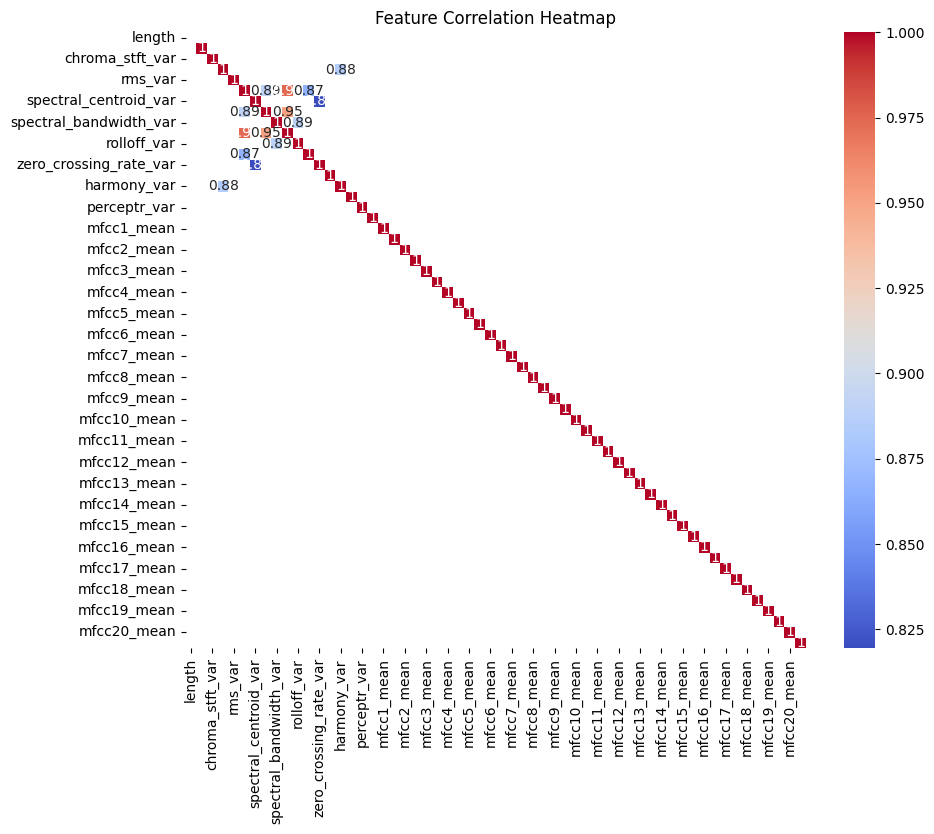

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
data = pd.read_csv('train.csv')

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a mask to highlight values with correlation >= 0.8
mask = correlation_matrix >= 0.8

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=~mask)
plt.title('Feature Correlation Heatmap')
plt.show()


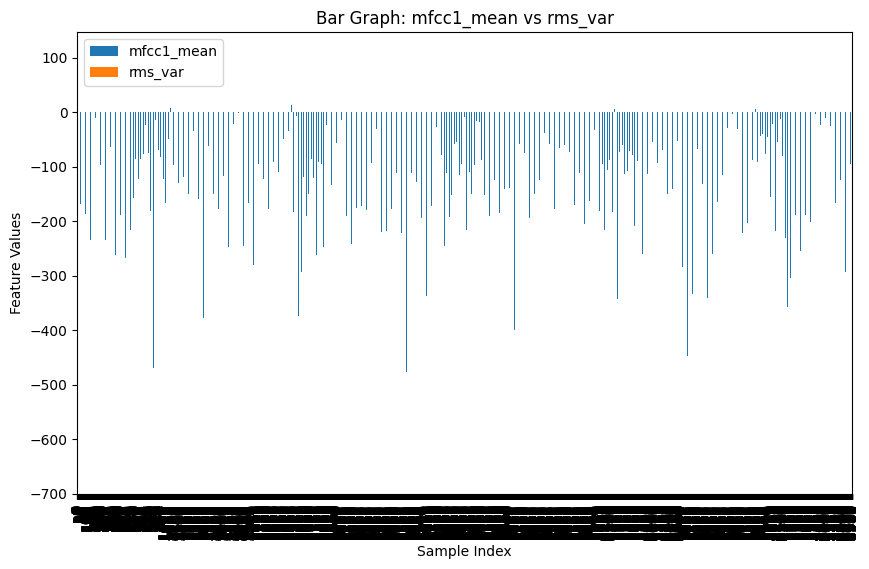

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
data = pd.read_csv('train.csv')

# Select the columns for 'mfcc1_mean' and 'rms_var'
selected_features = data[['mfcc1_mean', 'rms_var']]

# Create a bar graph
selected_features.plot(kind='bar', figsize=(10, 6))
plt.title('Bar Graph: mfcc1_mean vs rms_var')
plt.xlabel('Sample Index')
plt.ylabel('Feature Values')
plt.show()


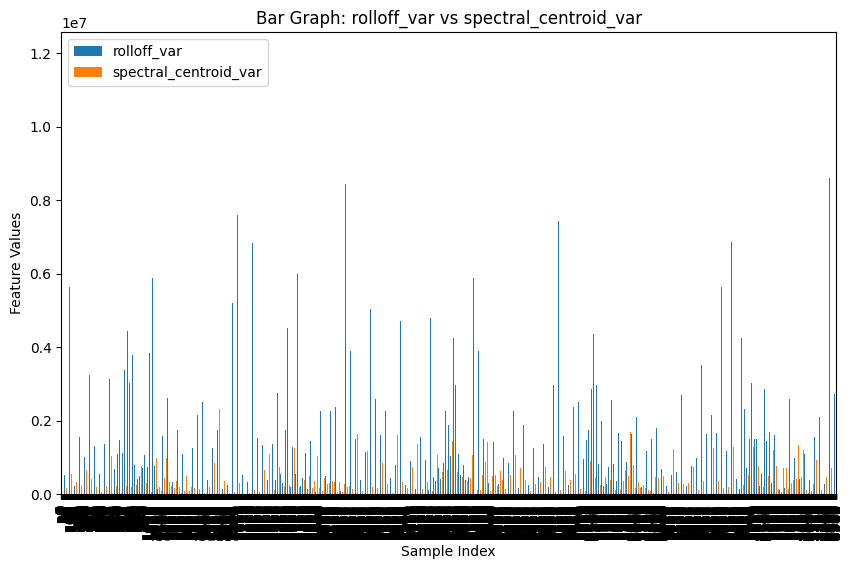

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
data = pd.read_csv('train.csv')

# Select the columns for 'rolloff_var' and 'spectral_centroid_var'
selected_features = data[['rolloff_var', 'spectral_centroid_var']]

# Create a bar graph
selected_features.plot(kind='bar', figsize=(10, 6))
plt.title('Bar Graph: rolloff_var vs spectral_centroid_var')
plt.xlabel('Sample Index')
plt.ylabel('Feature Values')
plt.show()


In [ ]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('train.csv')

# Split the data into features (X) and labels (y)
X = data.drop(columns=['label','filename'],)  # Features
y = data['label']  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the LinearSVC model
model = LinearSVC()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 21.79%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras

# Load the dataset (replace 'data.csv' with your dataset file)
data = pd.read_csv('train.csv')

# Exclude non-numeric columns (e.g., 'filename') from your features
X = data.drop(['label', 'filename', 'rolloff_mean', 'spectral_centroid_mean'], axis=1)

# Use the 'label' column for labels
y = data['label']

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize/Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Define the ANN model and compile it (as shown in the previous code)
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # 10 output units for 10 music genres
])
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model (as shown in the previous code)
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))
# Evaluate the model on the validation set (as shown in the previous code)
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation accuracy: {val_accuracy}")
# Load and preprocess the test data (replace 'test_data.csv' with your test data file)


Epoch 1/10
225/225 [==============================] - 1s 3ms/step - loss: 1.3323 - accuracy: 0.5310 - val_loss: 1.0076 - val_accuracy: 0.6654
Epoch 2/10
225/225 [==============================] - 0s 2ms/step - loss: 0.8407 - accuracy: 0.7140 - val_loss: 0.8446 - val_accuracy: 0.7165
Epoch 3/10
225/225 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.7722 - val_loss: 0.7317 - val_accuracy: 0.7526
Epoch 4/10
225/225 [==============================] - 0s 2ms/step - loss: 0.5744 - accuracy: 0.8088 - val_loss: 0.6594 - val_accuracy: 0.7888
Epoch 5/10
225/225 [==============================] - 0s 2ms/step - loss: 0.4970 - accuracy: 0.8373 - val_loss: 0.6112 - val_accuracy: 0.7954
Epoch 6/10
225/225 [==============================] - 0s 2ms/step - loss: 0.4356 - accuracy: 0.8561 - val_loss: 0.5973 - val_accuracy: 0.8054
Epoch 7/10
225/225 [==============================] - 0s 2ms/step - loss: 0.3851 - accuracy: 0.8747 - val_loss: 0.5520 - val_accuracy: 0.8271
Epoch 

In [ ]:
from sklearn.impute import SimpleImputer

# Identify columns with missing values
cols_with_missing_values = train_data.columns[train_data.isnull().any()]
# print(cols_with_missing_values)

In [ ]:
from sklearn.impute import SimpleImputer

# Assuming 'numerical_columns' contains the names of numerical columns and 'categorical_columns' contains the names of categorical columns with missing values
numerical_columns = ['mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean',
       'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var',
       'mfcc20_mean', 'mfcc20_var']
categorical_columns  = ['label']
# Numerical columns: Impute missing values with mean
numerical_imputer = SimpleImputer(strategy='mean')
train_data[numerical_columns] = numerical_imputer.fit_transform(train_data[numerical_columns])

# Categorical columns: Impute missing values with mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
train_data[categorical_columns] = categorical_imputer.fit_transform(train_data[categorical_columns])



In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'data' is your DataFrame containing all the columns
X = train_data.drop('label', axis=1)  # Features
X = X.drop('filename',axis = 1)
X = X.drop('rolloff_mean', axis=1)  # Features
X = X.drop('spectral_centroid_mean',axis = 1)
y = train_data['label']  # Output variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming you have X_train, X_test, y_train, and y_test already defined

# Create a pipeline with StandardScaler and RandomForestClassifier
rf_model = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, random_state=42))

# Fitting the model on the training data
rf_model.fit(X_train, y_train)

# Making predictions on the test data
rf_predictions = rf_model.predict(X_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy}')

# Additional metrics
print(classification_report(y_test, rf_predictions))


Random Forest Accuracy: 0.8560311284046692
              precision    recall  f1-score   support

       blues       0.86      0.88      0.87       180
   classical       0.92      0.94      0.93       180
     country       0.77      0.83      0.80       179
       disco       0.82      0.86      0.84       180
      hiphop       0.89      0.85      0.87       180
        jazz       0.85      0.91      0.88       180
       metal       0.85      0.91      0.88       180
         pop       0.86      0.90      0.88       180
      reggae       0.89      0.78      0.83       180
        rock       0.86      0.70      0.77       180

    accuracy                           0.86      1799
   macro avg       0.86      0.86      0.86      1799
weighted avg       0.86      0.86      0.86      1799



In [ ]:
import pandas as pd

# Load the test data
test_data = pd.read_csv('test.csv')

# Extract 'id' column for the final output
ids = test_data['id']  # Assuming 'id' is the name of the column

# Dropping columns not used in prediction
columns_to_drop = ['id', 'filename', 'rolloff_mean', 'spectral_centroid_mean']  # Features to drop
if 'id' in test_data.columns:
    test_data = test_data.drop('id', axis=1)
if 'filename' in test_data.columns:
    test_data = test_data.drop('filename', axis=1)
test_data = test_data.drop('rolloff_mean', axis=1)
test_data = test_data.drop('spectral_centroid_mean', axis=1)

# Making predictions on the test data
test_predictions = rf_model.predict(test_data)

# Dictionary to map integer values to class names
class_mapping = {
    'blues': 0,
    'classical':1,
    'country':2,
    'disco':3,
    'hiphop':4,
    'jazz':5,
    'metal':6,
    'pop':7,
    'reggae':8,
    'rock':9
}

# Map predicted integer values to class names
tp = test_predictions.tolist()
print(tp)
predicted_classes = [class_mapping[pred] for pred in tp]

# Creating a DataFrame with ids and corresponding predictions (class names)
results = pd.DataFrame({'id': ids, 'label': predicted_classes})

# Save the results to a new CSV file
results.to_csv('predicted_results.csv', index=False)


['rock', 'hiphop', 'pop', 'country', 'blues', 'country', 'metal', 'hiphop', 'disco', 'reggae', 'disco', 'pop', 'metal', 'blues', 'rock', 'metal', 'jazz', 'country', 'jazz', 'pop', 'disco', 'classical', 'disco', 'country', 'hiphop', 'metal', 'hiphop', 'reggae', 'country', 'reggae', 'classical', 'hiphop', 'jazz', 'jazz', 'disco', 'jazz', 'disco', 'classical', 'blues', 'country', 'pop', 'hiphop', 'jazz', 'rock', 'pop', 'jazz', 'disco', 'classical', 'blues', 'blues', 'reggae', 'reggae', 'country', 'reggae', 'classical', 'jazz', 'classical', 'blues', 'classical', 'hiphop', 'metal', 'country', 'blues', 'classical', 'country', 'jazz', 'reggae', 'jazz', 'hiphop', 'jazz', 'country', 'reggae', 'hiphop', 'reggae', 'blues', 'blues', 'metal', 'pop', 'classical', 'disco', 'blues', 'pop', 'pop', 'blues', 'disco', 'reggae', 'hiphop', 'hiphop', 'country', 'reggae', 'country', 'country', 'rock', 'rock', 'hiphop', 'rock', 'disco', 'blues', 'blues', 'hiphop', 'jazz', 'reggae', 'disco', 'metal', 'classical